In [15]:
import numpy as np

X = np.random.gamma(2.6,4,1000)

# Define the function to compute MoM estimates
def mom_estimates(X):
    mean_X = np.mean(X)
    var_X = np.var(X, ddof=1)
    alpha_hat = mean_X**2 / var_X
    beta_hat = mean_X/var_X
    return alpha_hat, beta_hat

# Bootstrap procedure
n = len(X)
n_boot = 10000 # Number of bootstrap samples
bootstrap_estimates = []
bootstrap_estimates_alpha = []
for i in range(n_boot):
    # Resample with replacement
    X_boot = np.random.choice(X, size=n, replace=True)
    # Compute the MoM estimates for the bootstrap sample
    alpha_boot, beta_boot = mom_estimates(X_boot)
    bootstrap_estimates.append(beta_boot)
    bootstrap_estimates_alpha.append(alpha_boot)

# Compute the 95% bootstrap confidence interval for beta
beta_bootstrap_CI = np.percentile(bootstrap_estimates, [2.5, 97.5])
alpha_bootstrap_CI = np.percentile(bootstrap_estimates_alpha, [2.5, 97.5])

print(f"95% Bootstrap CI for beta: {beta_bootstrap_CI}")
print(f"95% Bootstrap CI for alpha: {alpha_bootstrap_CI}")

95% Bootstrap CI for beta: [0.22952094 0.2790206 ]
95% Bootstrap CI for alpha: [2.42957388 2.92707592]


In [2]:
from scipy.stats import norm
import numpy as np


def mom_estimates(X):
    mean_X = np.mean(X)
    var_X = np.var(X, ddof=1)
    alpha_hat = mean_X**2 / var_X
    beta_hat = mean_X/var_X
    return alpha_hat, beta_hat

betas_CI = []
alphas_CI = []

betas_CI_boot = []
alphas_CI_boot = []
n_runs=30
beta_param = []

alpha, beta = 2,1
ticks = np.arange(100,5000,500)
for N in ticks:
    tmp_beta_l = 0
    tmp_beta_u = 0
    tmp_alpha_l = 0
    tmp_alpha_u=0


    tmp_beta_l_boot = 0
    tmp_beta_u_boot = 0
    tmp_alpha_l_boot = 0
    tmp_alpha_u_boot=0


    for i in range(n_runs):
        np.random.seed(i)
        X = np.random.gamma(alpha,1/beta,N)


        n = len(X)
        mean_X = np.mean(X)  # Sample mean
        var_X = np.var(X, ddof=1)  # Sample variance (unbiased)

        # MoM estimates
        alpha_hat = mean_X**2 / var_X
        beta_hat = mean_X/var_X

        #print(alpha_hat,beta_hat)
        # Approximate variances using delta method
        var_alpha_hat = (6* alpha_hat**2) / n  #+ beta_hat**4*var_X
        #var_alpha_hat = 4*alpha_hat**2/n #+ beta_hat**4*1/n*((6+3*alpha_hat)/alpha_hat - (n-3)/(n-1)*var_X)
        #var_beta_hat = (var_X**4 / mean_X**2  * (2 * alpha_hat**2 / n)) + (1 / n * alpha_hat * beta_hat**2)
        #var_beta_hat = beta_hat**2/alpha_hat*(1/n + beta_hat**3/alpha_hat*var_X)
        var_beta_hat = beta_hat**2/(n*alpha_hat) + beta_hat**6/alpha_hat**2*(2*alpha_hat**2)/beta_hat**4/n

        # Confidence level (e.g., 95%)
        confidence_level = 0.95
        z_alpha_2 = norm.ppf(1 - (1 - confidence_level) / 2)  # Critical value for normal distribution

        # Confidence intervals
        alpha_CI = (alpha_hat - z_alpha_2 * np.sqrt(var_alpha_hat), alpha_hat + z_alpha_2 * np.sqrt(var_alpha_hat))
        beta_CI = (beta_hat - z_alpha_2 * np.sqrt(var_beta_hat), beta_hat + z_alpha_2 * np.sqrt(var_beta_hat))

        tmp_alpha_u+= alpha_CI[1]
        tmp_alpha_l+=alpha_CI[0]

        tmp_beta_l+=beta_CI[0]
        tmp_beta_u+=beta_CI[1]


        n_boot = 500 # Number of bootstrap samples
        bootstrap_estimates = []
        bootstrap_estimates_alpha = []
        for i in range(n_boot):
            # Resample with replacement
            X_boot = np.random.choice(X, size=n, replace=True)
            # Compute the MoM estimates for the bootstrap sample
            alpha_boot, beta_boot = mom_estimates(X_boot)
            bootstrap_estimates.append(beta_boot)
            bootstrap_estimates_alpha.append(alpha_boot)

        # Compute the 95% bootstrap confidence interval for beta
        beta_bootstrap_CI = np.percentile(bootstrap_estimates, [2.5, 97.5])
        alpha_bootstrap_CI = np.percentile(bootstrap_estimates_alpha, [2.5, 97.5])

        tmp_alpha_u_boot+= alpha_bootstrap_CI[1]
        tmp_alpha_l_boot+=alpha_bootstrap_CI[0]

        tmp_beta_l_boot+=beta_bootstrap_CI[0]
        tmp_beta_u_boot+=beta_bootstrap_CI[1]


    alphas_CI.append((tmp_alpha_l/n_runs,tmp_alpha_u/n_runs))
    betas_CI.append((tmp_beta_l/n_runs,tmp_beta_u/n_runs))

    alphas_CI_boot.append((tmp_alpha_l_boot/n_runs,tmp_alpha_u_boot/n_runs))
    betas_CI_boot.append((tmp_beta_l_boot/n_runs,tmp_beta_u_boot/n_runs))



#beta_param.append((beta_hat,var_beta_hat))

    print(f"95% CI for alpha: {alphas_CI}")
    print(f"95% CI for beta: {betas_CI}")

95% CI for alpha: [(1.0424909385324284, 2.9677926867383038)]
95% CI for beta: [(0.7011274800767535, 1.3302140407521763)]
95% CI for alpha: [(1.0424909385324284, 2.9677926867383038), (1.595999211352892, 2.3741302962363586)]
95% CI for beta: [(0.7011274800767535, 1.3302140407521763), (0.8750709242615998, 1.1287431046775025)]
95% CI for alpha: [(1.0424909385324284, 2.9677926867383038), (1.595999211352892, 2.3741302962363586), (1.6885582144382703, 2.260144518437668)]
95% CI for beta: [(0.7011274800767535, 1.3302140407521763), (0.8750709242615998, 1.1287431046775025), (0.9012705121405229, 1.0873138001378861)]
95% CI for alpha: [(1.0424909385324284, 2.9677926867383038), (1.595999211352892, 2.3741302962363586), (1.6885582144382703, 2.260144518437668), (1.7541080155274102, 2.2326043661091406)]
95% CI for beta: [(0.7011274800767535, 1.3302140407521763), (0.8750709242615998, 1.1287431046775025), (0.9012705121405229, 1.0873138001378861), (0.9260691472566052, 1.0816642711358853)]
95% CI for alpha:

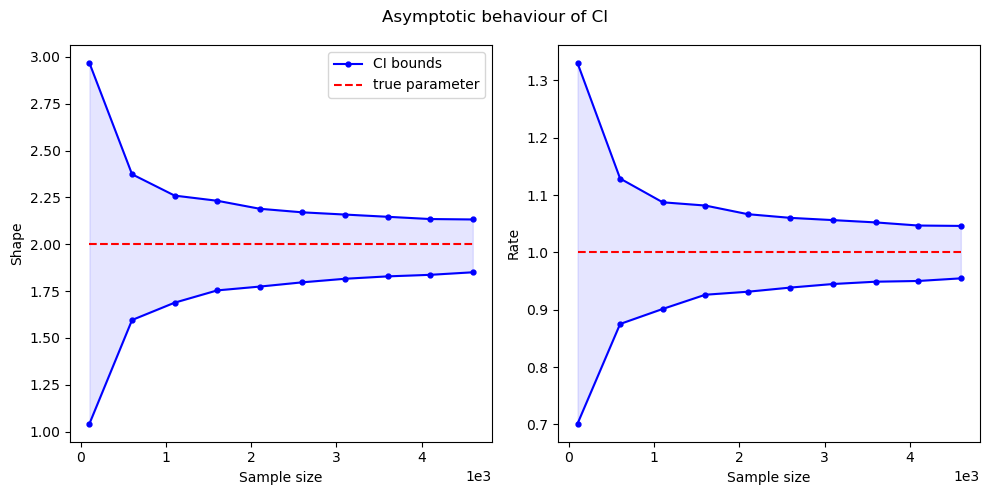

In [3]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(10,5))



ax[0].plot(ticks,[alphas_CI[i][0] for i in range(len(ticks))],color='blue',marker='.',markersize=7)

ax[0].plot(ticks,[alphas_CI[i][1] for i in range(len(ticks))],color='blue',marker='.',markersize=7,label='CI bounds')
ax[0].fill_between(ticks,[alphas_CI[i][0] for i in range(len(ticks))],[alphas_CI[i][1] for i in range(len(ticks))],color='blue',alpha=0.1)
ax[0].plot(ticks,alpha*np.ones(len(ticks)),color='red',ls='--',label='true parameter')
ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[0].set_ylabel('Shape')
ax[0].set_xlabel('Sample size')


ax[1].plot(ticks,[betas_CI[i][0] for i in range(len(ticks))],color='blue',marker='.',markersize=7)
ax[1].plot(ticks,[betas_CI[i][1] for i in range(len(ticks))],color='blue',marker='.',markersize=7)


ax[1].fill_between(ticks,[betas_CI[i][0] for i in range(len(ticks))],[betas_CI[i][1] for i in range(len(ticks))],color='blue',alpha=0.1)
ax[1].plot(ticks,beta*np.ones(len(ticks)),color='red',ls='--',label='True parameter')
ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax[0].legend()
ax[1].set_ylabel('Rate')

ax[1].set_xlabel('Sample size')
fig.suptitle('Asymptotic behaviour of CI')
fig.tight_layout()

In [25]:
from scipy.stats import gamma
from scipy.stats import norm


NUMBER_PATHS = 50
alpha =2
beta=1
data_paths_pre = np.random.gamma(alpha,scale=1/beta,size=(100,NUMBER_PATHS))
data_paths_post = np.random.gamma(alpha,scale=1/(beta+10),size=(100,NUMBER_PATHS))

data_paths = np.vstack((data_paths_pre,data_paths_post))
p = 0.95

# Function to compute CI for cumulative sum at each step
def gamma_conf_interval(step, a, b, confidence=0.95):
    alpha = step * a
    lower_bound = gamma.ppf((1 - confidence) / 2, alpha, scale=b)
    upper_bound = gamma.ppf(1 - (1 - confidence) / 2, alpha, scale=b)
    return lower_bound, upper_bound

BOUNDS =[gamma_conf_interval(t,alpha,1/beta,confidence=p) for t in range(200)]



def estimate_parameter_CI(X,p):
    alpha_hat, beta_hat = mom_estimates(X)
    n= len(X)
    var_alpha_hat = (6* alpha_hat**2) / n  #+ beta_hat**4*var_X
    var_beta_hat = beta_hat**2/(n*alpha_hat) + beta_hat**6/alpha_hat**2*(2*alpha_hat**2)/beta_hat**4/n

    # Confidence level (e.g., 95%)
    confidence_level = p
    z_alpha_2 = norm.ppf(1 - (1 - confidence_level) / 2)  # Critical value for normal distribution

    # Confidence intervals
    alpha_CI = (alpha_hat - z_alpha_2 * np.sqrt(var_alpha_hat), alpha_hat + z_alpha_2 * np.sqrt(var_alpha_hat))
    beta_CI = (beta_hat - z_alpha_2 * np.sqrt(var_beta_hat), beta_hat + z_alpha_2 * np.sqrt(var_beta_hat))

    return alpha_CI,beta_CI

In [50]:
alpha_lower, beta_lower = alphas_CI[-1][0],betas_CI[-1][0]
alpha_upper, beta_upper = alphas_CI[-1][1],betas_CI[-1][1]

In [78]:
BOUNDS_beta_MoM = {'Lower':[gamma_conf_interval(t,alpha_lower,1/beta_lower,confidence=p) for t in range(200)],'Upper':[gamma_conf_interval(t,alpha_upper,1/beta_upper,confidence=p) for t in range(200)]}

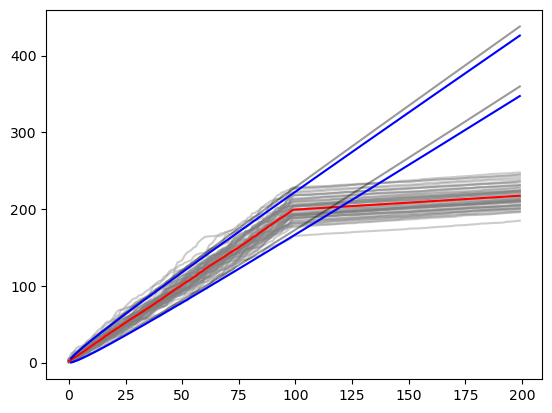

In [79]:
plt.plot(np.cumsum(data_paths,axis=0),color='gray',alpha=0.4);
plt.plot(np.cumsum(data_paths.mean(axis=1)),color='red')
plt.plot([b[0] for b in BOUNDS],color='black',alpha=0.4)
plt.plot([b[1] for b in BOUNDS],color='black',alpha=0.4)
plt.plot([b[0] for b in BOUNDS_beta_MoM['Lower']],color='blue')
plt.plot([b[1] for b in BOUNDS_beta_MoM['Lower']],color='blue')

#plt.plot([b[0] for b in BOUNDS_beta_MoM['Upper']],color='green')
#plt.plot([b[1] for b in BOUNDS_beta_MoM['Upper']],color='green')

In [1]:
import os
import pathlib 
import sys
path = pathlib.Path(os.getcwd()).parent
#sys.path.append(path)#'Explainability'))

str(os.path.join(path,'Explainability'))
sys.path.insert(1,str(path))#'Explainability'))
from Explainability.utils import *

sys.path

['/home/sven/miniconda3/envs/torch/lib/python312.zip',
 '/home/sven/Documents/GitHub/SWDCPD',
 '/home/sven/miniconda3/envs/torch/lib/python3.12',
 '/home/sven/miniconda3/envs/torch/lib/python3.12/lib-dynload',
 '',
 '/home/sven/miniconda3/envs/torch/lib/python3.12/site-packages',
 '/home/sven/miniconda3/envs/torch/lib/python3.12/site-packages/setuptools/_vendor']

In [264]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms


BATCH_SIZE = 32
mnist_transforms = transforms.Compose([transforms.ToTensor()])
train_val_dataset = datasets.MNIST(root="/home/sven/Documents/GitHub/SWDCPD/Explainability/datasets", train=True, download=True, transform=mnist_transforms)
test_dataset = datasets.MNIST(root="/home/sven/Documents/GitHub/SWDCPD/datasets/Explainability/datasets", train=False, download=True, transform=mnist_transforms)
train_val_dataset, test_dataset
train_size = int(0.9 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset=train_val_dataset, lengths=[train_size, val_size])
len(train_dataset), len(val_dataset), len(test_dataset)

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)
len(train_dataloader), len(val_dataloader), len(test_dataloader) 

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 7.66MB/s]


Extracting /home/sven/Documents/GitHub/SWDCPD/datasets/Explainability/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /home/sven/Documents/GitHub/SWDCPD/datasets/Explainability/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 254kB/s]


Extracting /home/sven/Documents/GitHub/SWDCPD/datasets/Explainability/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /home/sven/Documents/GitHub/SWDCPD/datasets/Explainability/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.49MB/s]


Extracting /home/sven/Documents/GitHub/SWDCPD/datasets/Explainability/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/sven/Documents/GitHub/SWDCPD/datasets/Explainability/datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 15.0MB/s]

Extracting /home/sven/Documents/GitHub/SWDCPD/datasets/Explainability/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/sven/Documents/GitHub/SWDCPD/datasets/Explainability/datasets/MNIST/raw



(1688, 188, 313)

In [ ]:
all_batches = []
all_labels =[]
torch.manual_seed(0)
for x,y in test_dataloader:
    bs = x.shape[0]
    all_batches.append(x.flatten().reshape(bs,784))
    all_labels.append(y)

all_batches = torch.cat(all_batches,dim=0)
all_labels = torch.cat(all_labels,dim=0)



data_c1 = all_batches[all_labels==0].detach().numpy()
data_c2 = all_batches[all_labels==9].detach().numpy()
THETA = sample_theta(data_c1,10000)
THETA.shape






0.05671366952373574

In [540]:
DATA = np.vstack((data_c1[:100,:],data_c2[:100,:]))

In [525]:
class TimeseriesDataset(torch.utils.data.Dataset):   
    def __init__(self, X, seq_len=1,split=0.5):
        self.X = X
        #self.y = y
        self.seq_len = seq_len
        self.split = split

    def __len__(self):
        return self.X.__len__() - (self.seq_len-1)

    def __getitem__(self, index):
        window = index + int(self.seq_len*self.split)
        print(index,window)
        #self.seq_len - int(self.seq_len//2)
        #print(window)
        return (self.X[index:window],self.X[window:window+ int(self.seq_len*(1-self.split))])

In [ ]:
40*0.9

In [443]:
import torch

def project_and_calc_dist_torch(X, Y, theta, p,device='cpu'):
    # Project data onto theta
    X = X.to(device)
    Y = Y.to(device)
    theta = theta.to(device)
    x_proj = torch.matmul(X, theta.T)
    y_proj = torch.matmul(Y, theta.T)

    # Generate quantile positions
    qs = torch.linspace(0, 1, 100, device=device)

    # Compute quantiles for x_proj and y_proj
    xp_quantiles = torch.quantile(x_proj, qs, dim=0, interpolation="lower")
    yp_quantiles = torch.quantile(y_proj, qs, dim=0, interpolation="lower")

    # Calculate the p-distance between quantiles
    dist_p = torch.abs(xp_quantiles - yp_quantiles)**p

    return dist_p


def sample_theta_torch(X, num_samples=10, device='cpu'):
    """
    Samples random normalized vectors (theta) using PyTorch.

    Args:
        X (torch.Tensor): Input tensor of shape (n_samples, d).
        num_samples (int): Number of random samples to generate.
        device (str): Device to perform computations on ('cpu' or 'cuda').

    Returns:
        torch.Tensor: Normalized random vectors of shape (num_samples, d).
    """
    _, d = X.shape
    # Generate random values
    theta = torch.randn(num_samples, d, device=device)
    # Compute the norm along the last dimension
    theta_norm = torch.norm(theta, dim=1, keepdim=True)
    # Normalize each vector
    theta_normed = theta / theta_norm
    return theta_normed


50.0

In [558]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_dataloader_ts = DataLoader(TimeseriesDataset(DATA,30,split=0.5))
SWDs = []

calibrated = False

for i , d in enumerate(train_dataloader_ts):
    print(i,d[0].shape,d[1].shape)
    x_ref, x_cur = d[0].squeeze(0).to(device),d[1].squeeze(0).to(device) 
    THETA = sample_theta_torch(x_ref,1000)
    loss = project_and_calc_dist_torch(x_ref,x_cur,THETA,p=2,device=device).mean(axis=0).detach().cpu().numpy()
    
    
    SWDs.append(loss.mean())
    if not calibrated:
        alpha_hat,beta_hat = mom_estimates(loss)
        calibrated = True
        lower_CI = [0]
        upper_CI  = [0]

    
    if calibrated:
        l,u = gamma_conf_interval(i,alpha_hat,1/beta_hat,0.95)
        lower_CI.append(l)
        upper_CI.append(u)


0 15
0 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
1 16
1 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
2 17
2 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
3 18
3 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
4 19
4 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
5 20
5 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
6 21
6 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
7 22
7 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
8 23
8 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
9 24
9 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
10 25
10 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
11 26
11 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
12 27
12 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
13 28
13 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
14 29
14 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
15 30
15 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
16 31
16 torch.Size([1, 15, 784]) torch.Size([1, 15, 784])
17 32
17 torch.Si

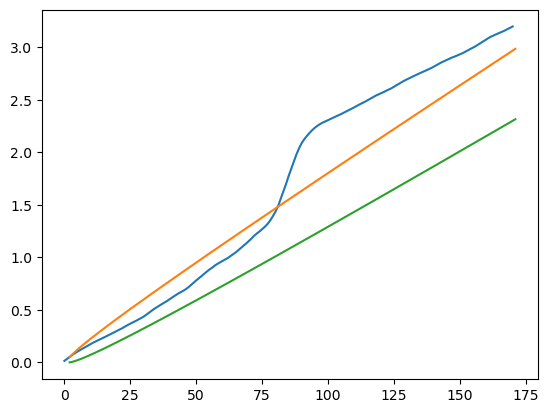

In [559]:
plt.plot(np.cumsum(SWDs))
plt.plot(upper_CI)
plt.plot(lower_CI)

In [479]:
data_c1.shape

(980, 784)

In [389]:
(np.linalg.norm(data_c1[:,:].mean(axis=0)-data_c2[:,:].mean(axis=0)))**2/784+np.linalg.norm((np.cov(data_c1[:,:].T))-np.cov(data_c2[:,:].T),ord='fro')/784

0.06720606710574173

In [390]:
np.linalg.norm((np.cov(data_c1[:200,:].T))-np.cov(data_c2[300:400,:].T),ord='fro')/784

0.017074389520528054

In [257]:
from Explainability.utils import *
import numpy as np
import matplotlib.pyplot as plt
d=3
mean_pre = np.zeros(d)
mean_post = mean_pre.copy()
#mean_post[0]=0
#mean_post[1] =0

N_TOTAL = 1000
X1 = np.random.multivariate_normal(mean_pre,np.eye(d),size=N_TOTAL)
Y1 = np.random.multivariate_normal(mean_pre,1*np.eye(d),size=N_TOTAL)

Y1_drift =  np.random.multivariate_normal(mean_post,1*np.eye(d),size=N_TOTAL)
print(np.linalg.norm(mean_pre-mean_post)**2/d + (0*d/d)**0.5)

SWD_pre_drift= []
for x,y in zip(np.split(X1,1),np.split(Y1_drift,1)):
    THETA = sample_theta(x,1000)

    swd = project_and_calc_dist(x,y,THETA,p=2).mean(axis=0)
    print(estimate_parameter_CI(swd,p=0.95),swd.mean())
    SWD_pre_drift.append(swd)

print(np.mean(SWD_pre_drift))


0.0
((4.391782854407974, 5.963974918192), (666.306132504008, 800.9839907783901)) 0.007057743801500993
0.007057743801500993


In [262]:
run_H1 = []
run_H0  =[]


for trial in range(20):
    for x,y,y1 in zip(np.split(X1,1),np.split(Y1_drift,1),np.split(Y1,1)):
        THETA = sample_theta(x,100)
        swd = project_and_calc_dist(x,y,THETA,p=2).mean(axis=0)
        #print(estimate_parameter_CI(swd,p=0.95),swd.mean())
        swd_pre = project_and_calc_dist(x,y1,THETA,p=2).mean(axis=0)
        alpha_hat, beta_hat = estimate_parameter_CI(swd_pre,0.95)  
        print(alpha_hat[0]/beta_hat[0]**2)
        print(alpha_hat[1]/beta_hat[1]**2)
    run_H1.append(swd.mean()) 
    run_H0.append(swd_pre.mean())


4.710495201145328e-05
3.900811537718961e-05
3.7210333252534744e-05
3.1446249228203474e-05
3.513076208924403e-05
2.962218373519398e-05
5.4657862970356696e-05
4.4390793370600336e-05
3.342180250547648e-05
2.8015539313060406e-05
4.703644189282232e-05
3.9441873495908685e-05
3.6085774449500065e-05
3.001780585113031e-05
3.95382983480454e-05
3.3225265217622937e-05
4.341336776322711e-05
3.609547226471191e-05
4.731309937837541e-05
3.964545607785409e-05
4.578789044433108e-05
3.788494280835972e-05
4.343253331821552e-05
3.6042352032039056e-05
5.020856706163878e-05
4.165233396088542e-05
3.182998796233108e-05
2.696466212754882e-05
4.655459569251772e-05
3.85600947518632e-05
5.0426558814438456e-05
4.158958223207557e-05
4.9829450525306264e-05
4.128535537799603e-05
5.062344625641559e-05
4.1886055094470786e-05
3.8470242837162524e-05
3.208227887333599e-05
4.581554339007042e-05
3.789395607693319e-05


4.323722587397732e-05
3.0470450345994085e-07


<Axes: ylabel='Density'>

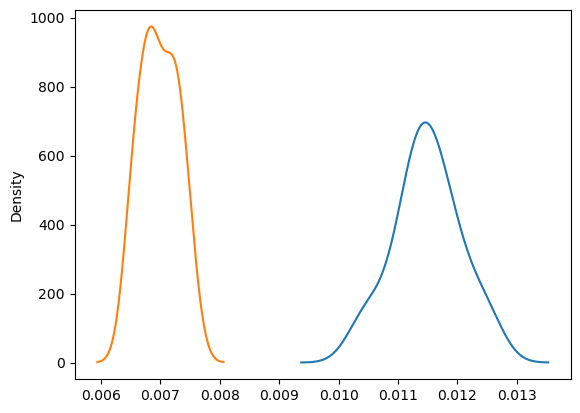

In [263]:
import pandas as pd

alpha_hat, beta_hat = mom_estimates(swd_pre)
print(alpha_hat/beta_hat**2)
df = pd.DataFrame(np.vstack((run_H0,run_H1)).T)
#df.head()
print(df.iloc[:,0].var())
df.iloc[:,0].plot.kde()
df.iloc[:,1].plot.kde()

0.008610587229196573

NameError: name 'alpha_CI' is not defined

In [59]:
SWD_pre_drift= []
SWD_post_drift = []
for x,y in zip(np.split(X1,20),np.split(Y1_drift,20)):
    THETA = sample_theta(x,1000)

    swd = project_and_calc_dist(x,y,THETA,p=2).mean(axis=0)
    print(estimate_parameter_CI(swd,p=0.95),swd.mean())
    SWD_pre_drift.append(swd)


((0.5502211063050682, 0.7471919687854507), (0.013994781911505546, 0.017690521557497407)) 40.946840744629455
((0.5702816430411775, 0.7744338752971862), (0.014277721518387049, 0.018015410179933307)) 41.640913953486454
((0.5694625068323641, 0.7733215006725981), (0.01492444309697662, 0.018832788699123856)) 39.77766943734042
((0.588098299952638, 0.7986286268294333), (0.015335809781770514, 0.019321088216330207)) 40.01301348026206
((0.5241239914564828, 0.7117524801873469), (0.014154426886992092, 0.017937998908505327)) 38.50991132671634
((0.6467443048353078, 0.8782690174788378), (0.016428465446626715, 0.020605394371182053)) 41.17889223042315
((0.5441800448475663, 0.7389882983841157), (0.014627742361386958, 0.018501189881517627)) 38.73255961959068
((0.5925806337412073, 0.8047155685513266), (0.016332885301922815, 0.020569667168206792)) 37.864486566981
((0.5500991736292682, 0.7470263860496267), (0.014025658064368233, 0.017729753745437653)) 40.84738587072425
((0.5250738697761462, 0.713042400627771

(500,)